# Radom Forest para Clasificación
- Fuente ejemplo: https://www.datacamp.com/community/tutorials/random-forests-classifier-python
- Base de datos: https://en.wikipedia.org/wiki/Iris_flower_data_set
- Documentación: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- Objetivo: Clasificación de la especia de planta

## 1. Cargar librerías y datos
### Librerías

In [110]:
#Manejo de datos
import pandas as pd
import numpy as np
#Gráficas
import seaborn as sns
import matplotlib.pyplot as plt

#Datos
from sklearn.datasets import load_iris

#Modelo
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#Métricas
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### Datos
The Iris dataset is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. The code below loads the iris dataset.

In [111]:
#Carga de datos
data = load_iris()
iris = pd.DataFrame(data.data, columns=data.feature_names)
iris['species'] = data.target
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## 2. Comprensión inicial de los datos
### Datos generales

In [112]:
#Descripción general de los datos
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### Relación gráfica

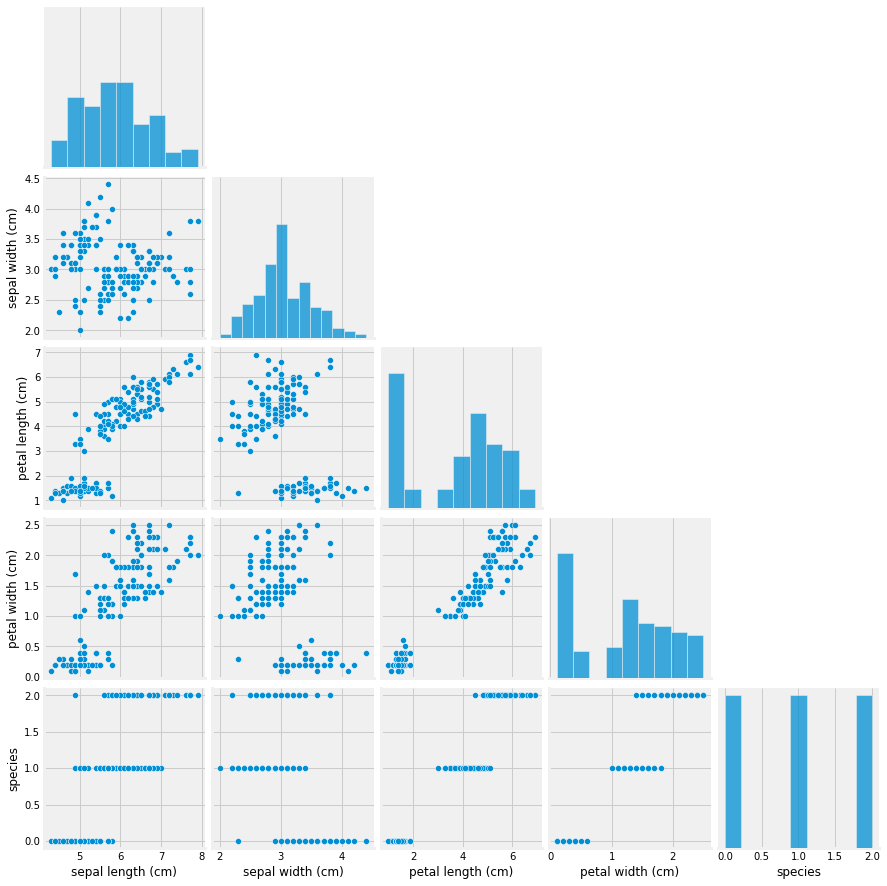

In [113]:
#Gráfica para verificar la relación no lineal
sns.pairplot(iris, corner=True)

<AxesSubplot:>

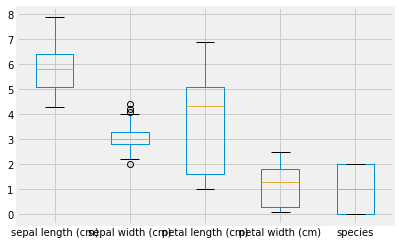

In [114]:
iris.boxplot()

## 3. Peparación de DataFrame

### DataFrame definitivo

In [115]:
X = iris[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]  # Features
y = iris['species']  # Labels
print(X)
print(y)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
0      0
1      0
2      0
3      0
4   

### Train-Test split

In [116]:
# División del data set en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test
print("Train shape")
print("X_train:" + str(X_train.shape))
print("y_train:" + str(y_train.shape))
print("Test shape")
print("X_test:" + str(X_test.shape))
print("y_test:" + str(y_test.shape))

Train shape
X_train:(105, 4)
y_train:(105,)
Test shape
X_test:(45, 4)
y_test:(45,)


## 4. Modelo

### 4.1 Modelo default
#### Entrenamiento

In [117]:
#Entrenamiento
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

RandomForestClassifier()

In [118]:
#Score: Métrica accuracy promedio de entrenamiento
clf.score(X_train, y_train)

1.0

#### Predicción

In [119]:
# Use the forest's predict method on the test data
predictions = clf.predict(X_test)
predictions

array([0, 0, 1, 0, 0, 2, 2, 0, 1, 2, 1, 1, 0, 2, 2, 2, 2, 2, 1, 0, 0, 1,
       1, 2, 2, 1, 1, 1, 0, 0, 1, 0, 2, 0, 1, 1, 0, 1, 0, 2, 2, 1, 1, 1,
       0])

In [120]:
#Score: Métrica accuracy promedio de prueba
clf.score(X_test, y_test)

0.9111111111111111

In [121]:
#Probabilidad de clasificación
print("especies:[0,1,2]")
print("probabilidad:")
clf.predict_proba(X_test)

especies:[0,1,2]
probabilidad:


array([[1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.03, 0.97, 0.  ],
       [0.99, 0.01, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.39, 0.61],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.38, 0.62],
       [0.  , 0.4 , 0.6 ],
       [0.  , 0.13, 0.87],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.96, 0.04, 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.55, 0.45],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.96, 0.04, 0.  ],
       [0.97, 0.03, 0.  ],
       [0.  , 0.95, 0.05],
       [1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.88, 0.12],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
 

#### Tabla de resultados

In [122]:
tabla = pd.DataFrame(X_test).copy()
#Agregar y_verdaderas
tabla['species'] = y_test
#Agregar y de predicción
tabla['species prediction'] = predictions
tabla['T/F'] = tabla['species']==tabla['species prediction']
tabla.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species prediction,T/F
46,5.1,3.8,1.6,0.2,0,0,True
22,4.6,3.6,1.0,0.2,0,0,True
85,6.0,3.4,4.5,1.6,1,1,True
41,4.5,2.3,1.3,0.3,0,0,True
2,4.7,3.2,1.3,0.2,0,0,True


In [123]:
#Cantidad verdader/falso
print(tabla['T/F'].value_counts())

#Proporción verdader/falso
print(((tabla['T/F'].value_counts())/len(tabla))*100)

True     41
False     4
Name: T/F, dtype: int64
True     91.111111
False     8.888889
Name: T/F, dtype: float64


### 4.2 Modelo iterado
#### GridSearch CV

In [124]:
#Modelo con GridSearch CrossValidation
model = RandomForestClassifier(criterion='entropy')

#Hiperparámetros
n_estimators_range = range(10,101,10) #Cantidad de árboles
max_depth_range = range(1,11) #Profundidad
min_samples_split_range = range(2,21,2) #Muestras requeridas para dividir un nodo 

#Optimización entre parámetros
gs = GridSearchCV(model,
                  param_grid = {'n_estimators':n_estimators_range,
                                'max_depth': max_depth_range,
                                'min_samples_split': min_samples_split_range},
                  cv=5, #cross validation
                  n_jobs=1,
                  scoring='accuracy')

gs.fit(X_train, y_train)

print(gs.best_params_)
print(gs.best_score_)

{'max_depth': 7, 'min_samples_split': 20, 'n_estimators': 10}
0.9714285714285713


#### Modelo con entropía

In [138]:
#Aplicar el modelo con los parámetros obtenidos
clf1 = RandomForestClassifier(max_depth = 7, min_samples_split= 20, n_estimators= 10,criterion='entropy')
clf1.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_split=20,
                       n_estimators=10)

In [139]:
#Score: Métrica accuracy promedio de entrenamiento
clf1.score(X_train, y_train)

0.9619047619047619

In [140]:
#Score: Métrica accuracy promedio de validación
clf1.score(X_test, y_test)

0.9333333333333333

#### Modelo con gini

In [141]:
#Entrenamiento
clf2 = RandomForestClassifier(max_depth = 7, min_samples_split= 20, n_estimators= 10,criterion='gini')
clf2.fit(X_train,y_train)

RandomForestClassifier(max_depth=7, min_samples_split=20, n_estimators=10)

In [142]:
#Score: Métrica accuracy promedio de entrenamiento
clf2.score(X_train, y_train)

0.9714285714285714

In [143]:
#Score: Métrica accuracy promedio en la validación
clf2.score(X_test, y_test)

0.9111111111111111

## 5. Evaluación del modelo

#### Matriz de confusión

In [131]:
#Matriz de confusión
pred1 = clf.predict(X_test)
print("confusion_matrix")
print(confusion_matrix(y_test, pred1))

confusion_matrix
[[15  0  0]
 [ 0 13  0]
 [ 0  4 13]]


#### Métricas
Documentación https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

In [132]:
#Reporte
print("Reporte de precisión")
print(classification_report(y_test, pred1))

Reporte de precisión
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.76      1.00      0.87        13
           2       1.00      0.76      0.87        17

    accuracy                           0.91        45
   macro avg       0.92      0.92      0.91        45
weighted avg       0.93      0.91      0.91        45



## 6. Features importance
Cálculo de la importancia de cada variable en el modelo, ya sea por el índice gini o entropía

In [133]:
# Importancia: Numerical feature importances
importances = list(clf.feature_importances_)
feature_imp = pd.Series(clf.feature_importances_,index=data.feature_names).sort_values(ascending=False)
feature_imp

petal length (cm)    0.479044
petal width (cm)     0.402327
sepal length (cm)    0.100525
sepal width (cm)     0.018104
dtype: float64

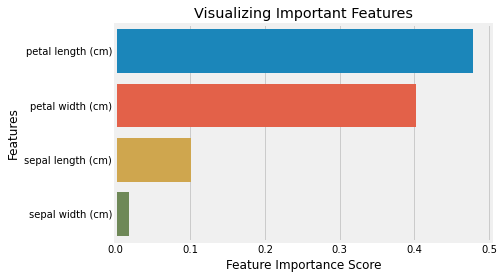

In [145]:
#Gráfica de importancia
%matplotlib inline
# Gráfico de barras
sns.barplot(x=feature_imp, y=feature_imp.index)
# Etiquetas y formato del gráfico
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()